This notebook is used as a "first look" of the kaggle competition ["Google Landmark Recognition 2019"](https://www.kaggle.com/c/landmark-recognition-2019) test set. 

Because the available test set of the 2020 comeptition is witouth its ground truth table we will use 2019 competition test set to evaluate our algorithm. 

The 2019 competition test set was released as CSV file with three columns: id (16-character string), landmarks (space-separated list of integer landmark IDs, or empty if no landmark from the dataset is depicted) and Usage (either "Public" or "Private", referring to which subset the image belongs to).

It can be found [here.](https://github.com/cvdfoundation/google-landmark)

In [2]:
# imports for code 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the data as pandas data frame 
df = pd.read_csv("C:/Users/Matan/Desktop/projectB/data/2019/recognition_solution_v2.1.csv") # one should change this path to his 
df

,id,landmarks,Usage
0,e324e0f3e6d9e504,NaN,Private
1,d9e17c5f3e0c47b3,NaN,Private
2,1a748a755ed67512,NaN,Public
3,537bf9bdfccdafea,NaN,Private
4,13f4c974274ee08b,NaN,Private
...,...,...,...
117572,e351c3e672c25fbd,190441,Public
117573,5426472625271a4d,NaN,Public
117574,7b6a585405978398,NaN,Public
117575,d885235ba249cf5d,NaN,Public


As we can see there are a lot of NaN values in the landmarks column. That mean that a lot of the objects in the test set are not landmarks but non-landmarks.

We will look now only on the landmarks inside the test set. 

In [4]:
df_no_NaN = df.dropna()
df_no_NaN

,id,landmarks,Usage
112,ed85edf01da02f26,179171,Public
155,4d5d0e6264e6c7e0,124703,Public
182,e153105026e18260,150977,Public
234,db635e33c17229bb,92607,Private
371,03b1294a0fa46763,184268,Private
...,...,...,...
117154,4e4e7fdca971442f,95197,Private
117242,efd80af423defb09,162786,Public
117264,90e066e0d0ac2827,188823,Private
117403,ee95080bf6187d9a,127232,Public


As we can see, most of the objects in the test set are non-landmarks.  

We'll now check few of the test set properties: 

In [5]:
print("number of ids is: {}" .format(df['id'].size))
print("\nnumber of landmarks ids is: {}" .format(df_no_NaN['id'].size))
print("\nnumber of unique values in landmarks column is: {}" .format(df['landmarks'].nunique()))

number of ids is: 117577

number of landmarks ids is: 1972

number of unique values in landmarks column is: 849


As we can see, the test set composed out of **117,577 pictures** that divided into **849 classes**. 
Only **1972 pictures** out of the 117,577 pictures in the test set are actually landmarkd, e.g only **1.67 %**  

We would like to look at the different classes in the test set, we we'll start with the top classes: 

In [9]:
print("top 10 classes:\n")
print(df_no_NaN['landmarks'].value_counts().head(10))

top 10 classes:

114046 171629    13
158276           12
100782           11
556              10
11868            10
189289           10
74275            10
107743           10
31765            10
149453           10
Name: landmarks, dtype: int64


As we can see from the top result, some images can relate to more than one class. 
We would like to know how many images can realte to more than one 

In [41]:
# We'll creata new data frame thus if one image relate to more then one class we'll split the classes to other columns.   
new_df = df_no_NaN["landmarks"].str.split(" ", n = 10, expand = True) 
new_df.shape

(1972, 4)

As we can see, one image can relate to different classes (up to 4). 

In [71]:
# now we'll concat the four columns to 1 and drop the NaN
concat_df = pd.concat([new_df[0], new_df[1], new_df[2], new_df[3]]).dropna()
concat_df = concat_df.to_frame('landmarks')
print("The classes that appear in the test set, seperated:")
concat_df

The classes that appear in the test set, seperated:


,landmarks
112,179171
155,124703
182,150977
234,92607
371,184268
...,...
103588,52006
112241,76017
112419,52006
115301,48571


In [91]:
print(concat_df['landmarks'].value_counts().head(10))

print("\nnumber of unique values in landmarks column is: {}" .format(concat_df['landmarks'].nunique()))

100782    16
185558    16
114046    15
171629    13
47378     12
121008    12
132969    12
158276    12
178061    11
146388    11
Name: landmarks, dtype: int64

number of unique values in landmarks column is: 852


As we can see from the above, when we first split and then concatenate the landmarks coulmn, it changed the amount of recurrence of some classes. It also changed the amount of classes to **852 classes**. 

We would like to plot the classes histogram:

<Figure size 432x288 with 0 Axes>

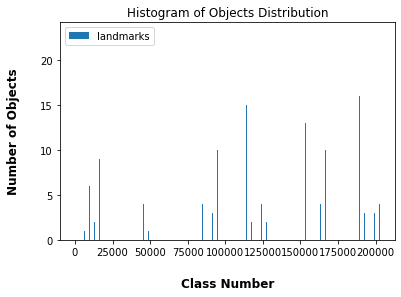

In [105]:
concat_df_float = concat_df.astype(float)
fig = plt.figure()
ax = concat_df_float.plot.hist(bins=852, grid=False, rwidth=0.1)
ax.set_xlabel("Class Number", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of Objects", labelpad=20, weight='bold', size=12)
ax.set_title("Histogram of Objects Distribution")
plt.show()

As we can see from the histogram, the classes are scattered across the x axis.  

We would like to inspect the top and bottom classes more carefulley:

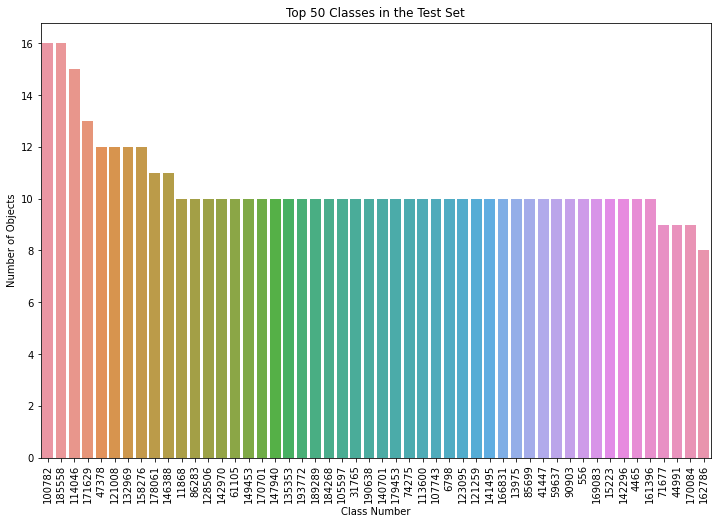

In [113]:
fig2 = plt.figure(figsize = (12,8))
sns.countplot(x=concat_df.landmarks, order = concat_df['landmarks'].value_counts().head(50).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Top 50 Classes in the Test Set")
plt.xticks(rotation = 90)
plt.show()

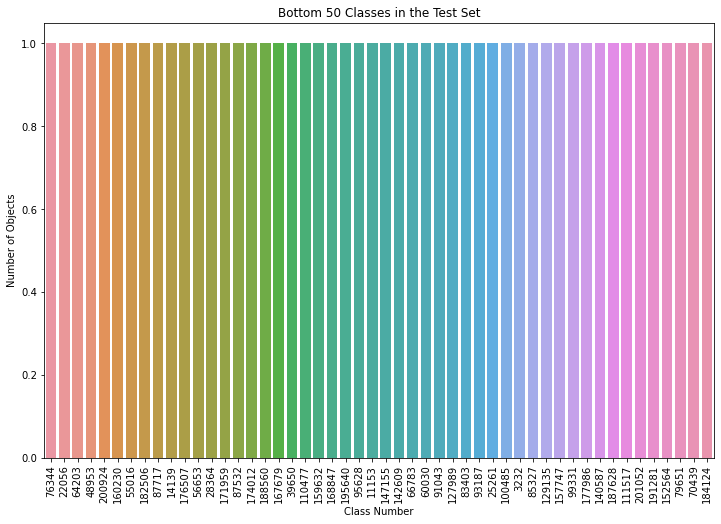

In [114]:
fig2 = plt.figure(figsize = (12,8))
sns.countplot(x=concat_df.landmarks, order = concat_df['landmarks'].value_counts().tail(50).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Bottom 50 Classes in the Test Set")
plt.xticks(rotation = 90)
plt.show()

As we can see from the above, the top classes don't appear very often in the test set and a lot of classes appear only once in the train set. 

This is the 2019 test set we will use to evaluate our algorithm.  